In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("/home/saahil/Desktop/Netflix-Recommendation/CONTENT_INTERACTION/ViewingActivity.csv")
#Planned to create a chart on my viewing habits for the show How I Met Your Mother
#Got idea from dataquest.io

In [3]:
df.shape
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2019-03-28 09:51:02,00:00:31,Autoplayed: user action: Unspecified;,Benji,NaN,Chrome PC (Cadmium),00:00:31,00:00:31,IN (India)


In [4]:
#Drop unnecessary columns that are not required
df = df.drop(["Profile Name", "Supplemental Video Type", "Attributes", "Device Type", "Bookmark", "Latest Bookmark", "Country"], axis =1)
df.head(5)

,Start Time,Duration,Title
0,2019-03-28 09:51:02,00:00:31,Benji
1,2018-10-07 02:41:13,00:10:41,Planet Earth: Season 1: From Pole to Pole (Epi...
2,2018-10-07 02:17:42,00:20:51,The Boss Baby: Back in Business: Season 1: Sco...
3,2021-02-15 23:49:00,00:01:52,Parks and Recreation: Season 6: Recall Vote (E...
4,2021-02-15 23:27:56,00:21:03,Parks and Recreation: Season 6: Filibuster (Ep...


In [5]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [6]:
#Convert object datatype to date and time in UTC
df["Start Time"] = pd.to_datetime(df["Start Time"], utc = True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [7]:
df = df.set_index("Start Time")

In [8]:
#Convert time to Pacific time
df.index = df.index.tz_convert("US/Pacific")
df = df.reset_index()
df.head(1)

,Start Time,Duration,Title
0,2019-03-28 02:51:02-07:00,00:00:31,Benji


In [9]:
#Time Delta refers to the difference in time
df["Duration"] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Pacific]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [10]:
#Create a dataframe with values of the original dataframe just for HIMYM
himym = df[df['Title'].str.contains('How I Met Your Mother', regex = False)]
himym

,Start Time,Duration,Title
384,2021-01-22 15:28:07-08:00,00:00:17,How I Met Your Mother: Season 1_hook_primary_16x9
2370,2020-06-25 23:53:55-07:00,00:00:04,How I Met Your Mother: Season 1_hook_02_16x9
4396,2020-01-20 09:27:48-08:00,00:00:05,How I Met Your Mother: Season 1_hook_primary_16x9
4420,2020-01-18 21:46:12-08:00,00:19:42,How I Met Your Mother: Season 9: Last Forever:...
4421,2020-01-18 21:25:47-08:00,00:20:24,How I Met Your Mother: Season 9: Last Forever:...
...,...,...,...
13006,2019-01-05 13:59:50-08:00,00:04:06,How I Met Your Mother: Season 1: Return of the...
13007,2019-01-05 13:33:48-08:00,00:20:27,How I Met Your Mother: Season 1: The Sweet Tas...
13008,2019-01-05 13:16:16-08:00,00:10:01,How I Met Your Mother: Season 1: Purple Giraff...
13009,2019-01-04 21:25:37-08:00,00:08:31,How I Met Your Mother: Season 1: Purple Giraff...


In [11]:
#Filter our times less than 2 minutes
himym = himym[himym["Duration"]> '0 days 00:02:00']
himym.shape

(518, 3)

In [12]:
himym['Duration'].sum()

Timedelta('5 days 07:53:20')

In [13]:
himym['Day'] = himym['Start Time'].dt.weekday
himym["Hour"] = himym["Start Time"].dt.hour
himym

<ipython-input-13-099976c9be98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  himym['Day'] = himym['Start Time'].dt.weekday
<ipython-input-13-099976c9be98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  himym["Hour"] = himym["Start Time"].dt.hour


,Start Time,Duration,Title,Day,Hour
4420,2020-01-18 21:46:12-08:00,00:19:42,How I Met Your Mother: Season 9: Last Forever:...,5,21
4421,2020-01-18 21:25:47-08:00,00:20:24,How I Met Your Mother: Season 9: Last Forever:...,5,21
4422,2020-01-18 21:06:14-08:00,00:17:34,How I Met Your Mother: Season 9: The End of th...,5,21
4428,2020-01-18 15:34:00-08:00,00:20:21,How I Met Your Mother: Season 9: Gary Blauman ...,5,15
4429,2020-01-18 15:12:51-08:00,00:19:26,How I Met Your Mother: Season 9: Daisy (Episod...,5,15
...,...,...,...,...,...
13006,2019-01-05 13:59:50-08:00,00:04:06,How I Met Your Mother: Season 1: Return of the...,5,13
13007,2019-01-05 13:33:48-08:00,00:20:27,How I Met Your Mother: Season 1: The Sweet Tas...,5,13
13008,2019-01-05 13:16:16-08:00,00:10:01,How I Met Your Mother: Season 1: Purple Giraff...,5,13
13009,2019-01-04 21:25:37-08:00,00:08:31,How I Met Your Mother: Season 1: Purple Giraff...,4,21


In [14]:
#Makes the matlplotlib charts appear on the notebook
%matplotlib inline
import matplotlib

<ipython-input-15-bc24dae11ddd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  himym["Day"] = pd.Categorical(himym["Day"], categories = [0,1,2,3,4,5,6], ordered = True)


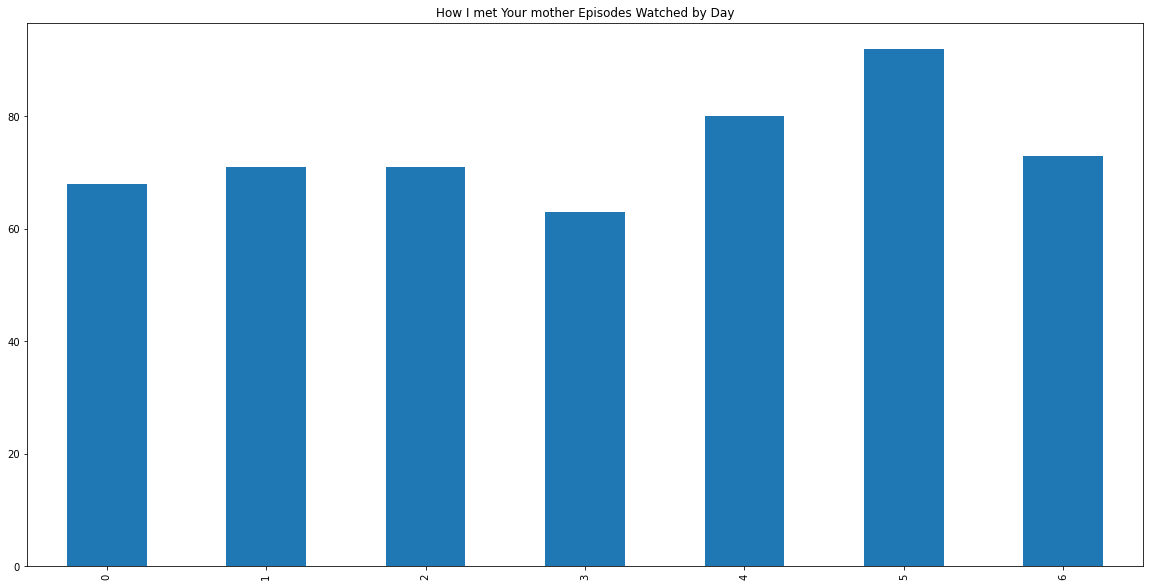

In [15]:
#Time to order the charts
himym["Day"] = pd.Categorical(himym["Day"], categories = [0,1,2,3,4,5,6], ordered = True)

#Count row values to the variables
himym_days = himym['Day'].value_counts()

#Sort the index
himym_days = himym_days.sort_index()

himym_days.plot(kind='bar', figsize=(20,10), title='How I met Your mother Episodes Watched by Day')


<ipython-input-17-9aa969f36fe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  himym["Hour"] = pd.Categorical(himym["Hour"], categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered = True)


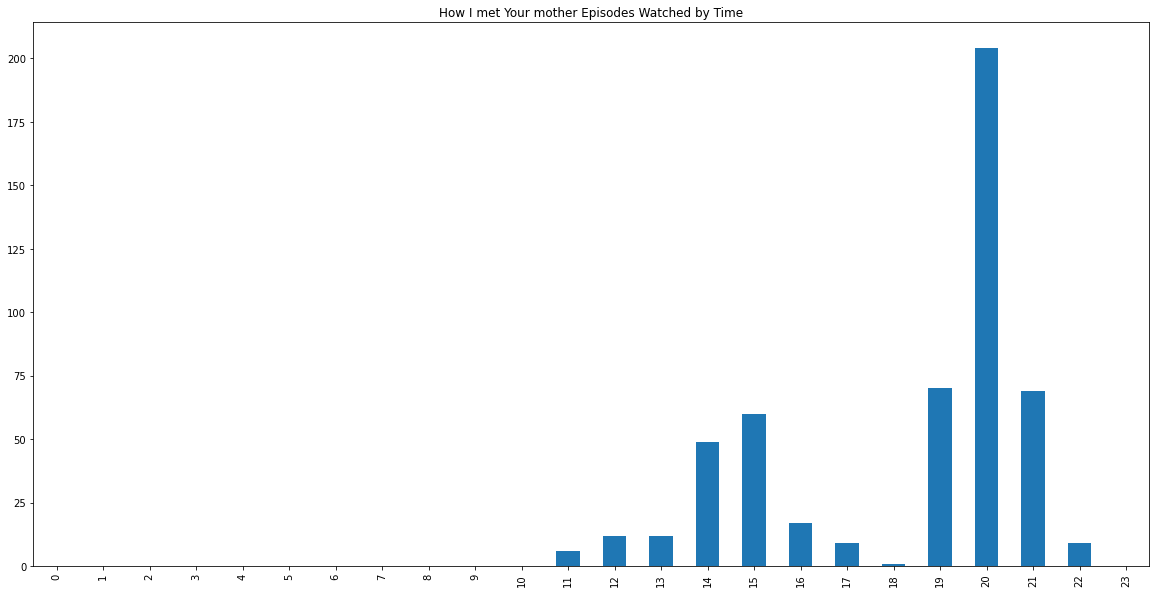

In [17]:
#Time to order the charts
himym["Hour"] = pd.Categorical(himym["Hour"], categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered = True)

#Count row values to the variables
himym_hour = himym['Hour'].value_counts()

#Sort the index
himym_hour = himym_hour.sort_index()

#24-hour time
himym_hour.plot(kind='bar', figsize=(20,10), title='How I met Your mother Episodes Watched by Time')
